In [5]:
import os
import time
#list of input files
dir_in='f:/data/tc_wakes/database/info/'
dir_out='f:/data/tc_wakes/database/sst/'
dir_mur = 'F:/data/sst/jpl_mur/v4.1/'
dir_flux = 'F:/data/model_data/oaflux/data_v3/daily/turbulence/'
dir_cmc = 'F:/data/sst/cmc/CMC0.2deg/v2/'
#################################################################################
import datetime as dt
import xarray as xr
from datetime import datetime
import matplotlib.pyplot as plt
import math
import numpy as np


In [6]:
dir_ccmp='F:/data/sat_data/ccmp/v02.0/Y'
date_1858 = dt.datetime(1858,11,17,0,0,0) # start date is 11/17/1958
dx=0.25
dy=0.25
dx_offset = -179.875
dy_offset = -78.3750


In [7]:
storm_date = dt.datetime(2006,10,3)
syr=str(storm_date.year)
smon=str(storm_date.month)
sdym=str(storm_date.day)
sjdy=str(storm_date.timetuple().tm_yday)
print(sjdy)
filename='F:/data/sst/cmc/CMC0.2deg/v2/climatology/clim1993_2016' + sjdy.zfill(3) + '-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0a.nc'
ds_day=xr.open_dataset(filename,drop_variables=['analysis_error','sea_ice_fraction','sq_sst'])
ds_day = ds_day.rename({'analysed_sst':'analysed_sst_clim','mask':'mask_clim'}) #, inplace = True)            
ds_day.close()
ds_day

276


<xarray.Dataset>
Dimensions:            (lat: 901, lon: 1800)
Coordinates:
  * lat                (lat) float32 -90.0 -89.8 -89.6 -89.4 ... 89.6 89.8 90.0
  * lon                (lon) float32 -180.0 -179.8 -179.6 ... 179.4 179.6 179.8
Data variables:
    analysed_sst_clim  (lat, lon) float32 ...
    mask_clim          (lat, lon) float32 ...

In [8]:
#make lat and lon of storm onto 25 km grid for below
import numpy
minlon, maxlon, minlat, maxlat = -123.,-95., 2., 37.
print(round((maxlat - minlat)/.25))
ydim_storm = int(round((maxlat - minlat)/.25))
new_lat_storm = np.linspace(minlat, maxlat, ydim_storm)
xdim_storm = int(round((maxlon - minlon)/.25))
new_lon_storm = np.linspace(minlon, maxlon, xdim_storm)

storm_date = dt.datetime(2006,10,3)
syr=str(storm_date.year)
smon=str(storm_date.month)
sdym=str(storm_date.day)
sjdy=str(storm_date.timetuple().tm_yday)

fname_tem=syr + smon.zfill(2) + sdym.zfill(2) + '120000-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0.nc'
filename = dir_cmc + syr + '/' + sjdy.zfill(3) + '/' + fname_tem
ds_day=xr.open_dataset(filename,drop_variables=['analysis_error','sea_ice_fraction'])
ds_day.close()
ds_masked = ds_day.where(ds_day['mask'] == 1.) 
ds_storm = ds_day.interp(lat = new_lat_storm,lon = new_lon_storm)
ds_storm_masked = ds_masked.interp(lat = new_lat_storm,lon = new_lon_storm)


140


In [9]:
ds_storm

<xarray.Dataset>
Dimensions:       (lat: 140, lon: 112, time: 1)
Coordinates:
  * time          (time) datetime64[ns] 2006-10-03T12:00:00
  * lat           (lat) float64 2.0 2.252 2.504 2.755 ... 36.24 36.5 36.75 37.0
  * lon           (lon) float64 -123.0 -122.7 -122.5 ... -95.5 -95.25 -95.0
Data variables:
    analysed_sst  (time, lat, lon) float64 298.4 298.5 298.6 ... 292.0 292.0
    mask          (time, lat, lon) float64 1.0 1.0 1.0 1.0 ... 2.0 2.0 2.0 2.0
Attributes:
    Conventions:                CF-1.4
    title:                      CMC 0.2 deg global sea surface temperature an...
    summary:                    Applies the method of statistical interpolati...
    references:                 Brasnett B. 2008. The impact of satellite ret...
    institution:                CMC
    history:                    Processed through sfc.thin_sst, sfc.sstobs, i...
    comment:                    WARNING Some applications are unable to prope...
    license:                    GHRSST pro

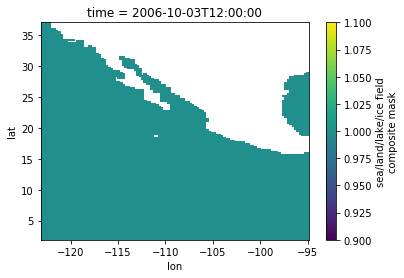

In [10]:
ds_storm_masked.mask.plot()

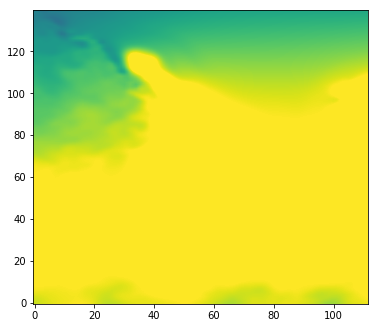

In [11]:
#dssubset = ds_day.sel(lat=slice(2,37),lon=slice(-123,-95))
#subset = subset.where(subset['mask_clim'] == 1.) 
fig, (ax1) = plt.subplots(nrows=1, figsize=(6, 5.4))
im = ax1.imshow(ds_storm.analysed_sst[0,:,:], interpolation='bilinear',aspect='auto',origin='lower',vmin=280,vmax=300)
                        #extent=[x0, x1, y0, y1])
#ax1.set_title('SST')
#cbar = fig.colorbar(im, extend='both', shrink=0.9, ax=ax1)
#cbar.set_label('SST - SST climatology')


In [14]:
subset

<xarray.Dataset>
Dimensions:       (lat: 176, lon: 141, time: 1)
Coordinates:
  * time          (time) datetime64[ns] 2006-10-03T12:00:00
  * lat           (lat) float32 2.0 2.2 2.4 2.6 2.8 ... 36.2 36.4 36.6 36.8 37.0
  * lon           (lon) float32 -123.0 -122.8 -122.6 ... -95.4 -95.2 -95.0
Data variables:
    analysed_sst  (time, lat, lon) float32 298.37 298.43 ... 292.03 292.03
    mask          (time, lat, lon) float32 1.0 1.0 1.0 1.0 ... 2.0 2.0 2.0 2.0
Attributes:
    Conventions:                CF-1.4
    title:                      CMC 0.2 deg global sea surface temperature an...
    summary:                    Applies the method of statistical interpolati...
    references:                 Brasnett B. 2008. The impact of satellite ret...
    institution:                CMC
    history:                    Processed through sfc.thin_sst, sfc.sstobs, i...
    comment:                    WARNING Some applications are unable to prope...
    license:                    GHRSST proto

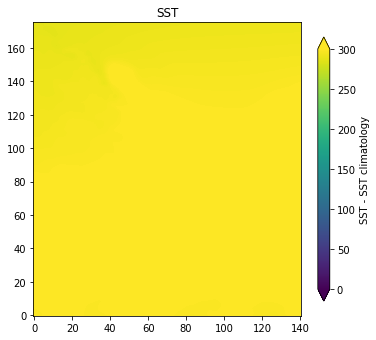

In [15]:
subset = ds_day.sel(lat=slice(2,37),lon=slice(-123,-95))
#subset = subset.where(subset['mask_clim'] == 1.) 
fig, (ax1) = plt.subplots(nrows=1, figsize=(6, 5.4))
im = ax1.imshow(subset.analysed_sst[0,:,:], interpolation='bilinear',
                aspect='auto',
                origin='lower',vmin=0,vmax=300)
                        #extent=[x0, x1, y0, y1])
ax1.set_title('SST')
cbar = fig.colorbar(im, extend='both', shrink=0.9, ax=ax1)
cbar.set_label('SST - SST climatology')


In [21]:
filename = 'F:/data/tc_wakes/database/sst/2006/055_combined_data.nc'
ds=xr.open_dataset(filename)
ds

<xarray.Dataset>
Dimensions:            (lat: 147, lon: 155, time: 37)
Coordinates:
  * lat                (lat) float64 2.125 2.377 2.628 ... 38.37 38.62 38.88
  * lon                (lon) float64 -123.1 -122.9 -122.6 ... -84.63 -84.38
  * time               (time) datetime64[ns] 2006-08-28T12:00:00 ... 2006-10-03T12:00:00
Data variables:
    uwnd               (time, lat, lon) float64 ...
    vwnd               (time, lat, lon) float64 ...
    lhtfl              (time, lat, lon) float64 ...
    shtfl              (time, lat, lon) float64 ...
    tmp2m              (time, lat, lon) float64 ...
    hum2m              (time, lat, lon) float64 ...
    analysed_sst       (time, lat, lon) float64 ...
    mask               (time, lat, lon) float64 ...
    analysed_sst_clim  (time, lat, lon) float64 ...
    mask_clim          (time, lat, lon) float64 ...

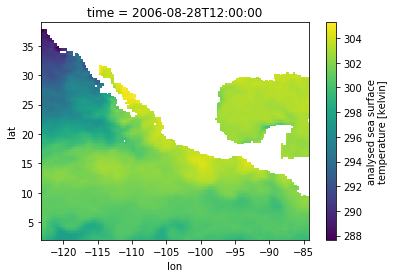

In [22]:
ds.analysed_sst[0,:,:].plot()

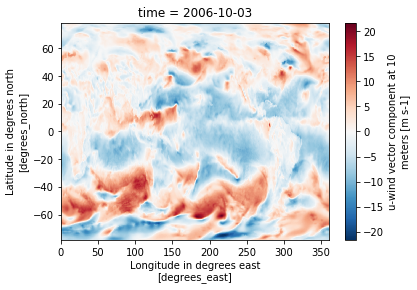

In [18]:
dir_ccmp='F:/data/sat_data/ccmp/v02.0/Y'
#            lyr, idyjl = 2015,1
#            storm_date = dt.datetime(2015,1,1)
syr, smon, sdym, sjdy=str(storm_date.year),str(storm_date.month),str(storm_date.day),str(storm_date.timetuple().tm_yday)
fname_tem='/CCMP_Wind_Analysis_' + syr + smon.zfill(2) + sdym.zfill(2) + '_V02.0_L3.0_RSS.nc'
ccmp_filename = dir_ccmp + syr + '/M' + smon.zfill(2) + fname_tem      
ds=xr.open_dataset(ccmp_filename,drop_variables=['nobs'])
ds.close()
ds.uwnd[0,:,:].plot()

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    time     int32 276
Data variables:
    lhtfl    (lat, lon) float32 ...
Attributes:
    creation_date:  Oct 2012
    description:    WHOI Objectively Analyzed air-sea Fluxes (OAFlux) Project
    project_PIs:    Lisan Yu, Bob Weller
    website:        http://oaflux.whoi.edu
<xarray.DataArray 'lhtfl' ()>
array(nan, dtype=float32)
Coordinates:
    lon      float32 0.5
    lat      float32 -89.5
    time     int32 276
Attributes:
    comments:  daily mean surface latent heat flux, positive upward
    units:     W/m^2


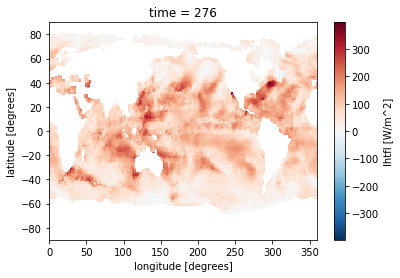

In [19]:
filename = dir_flux + 'lh_oaflux_' + syr + '.nc';
ds=xr.open_dataset(filename,drop_variables=['err'])
ds_day = ds.sel(time = storm_date.timetuple().tm_yday)  #select day of year from annual file
ds_day.close()
print(ds_day)
ds_day.lhtfl.plot()
print(ds_day.lhtfl[0,0])

In [25]:
filename = 'F:/data/tc_wakes/database/sst/2006/055_all_25km.nc'
dsx = xr.open_dataset(filename)
lats = dsx.lat[0,:]
lons = dsx.lon[0,:]  #lons goes from 0 to 360
lons = (lons + 180) % 360 - 180
dysince = dsx.time
dsx.close()


AttributeError: 'Dataset' object has no attribute 'lat'

In [ ]:
for root, dirs, files in os.walk(dir_in, topdown=False):
    if root[len(dir_in):len(dir_in)+1]=='.':
        continue
#    if root[len(dir_in):len(dir_in)+4]=='2002':
#        continue
#    for ii in range(12,13): 
    for name in files:
#        name = files[ii]
#    for name in files:
        fname_in=os.path.join(root, name)
        fname_out=dir_out + fname_in[31:39] + '_all_25km.nc'
        inum_storm=int(fname_in[36:39])
        iyr_storm=int(fname_in[31:35])
        if iyr_storm<=2003: # or iyr_storm<2003:
            continue
#        if iyr_storm==2011 and inum_storm<15:
#            continue
        print(name,fname_in)
        dsx = xr.open_dataset(fname_in)
        lats = dsx.lat[0,:]
        lons = dsx.lon[0,:]  #lons goes from 0 to 360
        lons = (lons + 180) % 360 - 180
        dysince = dsx.time
        dsx.close()
        
#make lat and lon of storm onto 25 km grid for below
        lons = (((lons - .125)/.25+1).astype(int)-1)*.25+.125
        lats = (((lats + 89.875)/.25+1).astype(int)-1)*.25-89.875
        
        iwrap=0
        minlon=min(lons.values)-10
        maxlon=max(lons.values)+10
        minlat=min(lats.values)-10
        maxlat=max(lats.values)+10
        print('here:',minlon,maxlon)

        ydim_storm = round((maxlat - minlat)/.25).astype(int)
        new_lat_storm = np.linspace(minlat, maxlat, ydim_storm)
        if (minlon<-90 and maxlon>=90) or (minlon<-180 and maxlon<0):  #this storm wraps  keep everythig 0 to 360 then wrap data at very end
            iwrap = 1
            lons2 = np.mod(lons, 360)
            minlon, maxlon = min(lons2.values)-10, max(lons2.values)+10
            xdim_storm = round((maxlon - minlon)/.25).astype(int)
            new_lon_storm = np.linspace(minlon, maxlon, xdim_storm)
        else:
            xdim_storm = round((maxlon - minlon)/.25).astype(int)
            new_lon_storm = np.linspace(minlon, maxlon, xdim_storm)

        print(iwrap,minlon,maxlon)
        print(iwrap,xdim_storm, new_lon_storm[:5],new_lon_storm[-5:])

        
        dims=lats.shape
        tdim=dims[0]
        tem_date=[0]*tdim #print(dysince.values)
        for i in range(0,tdim):
            tem_date[i]=date_1858+dt.timedelta(days=float(dysince[0,i].values))  #create new time array that can be queried for year etc
        minjdy = min(tem_date).timetuple().tm_yday  #create new time array that can be queried for year etc
        minyear =min(tem_date).year #create new time array that can be queried for year etc
        minmon =min(tem_date).month #create new time array that can be queried for year etc
        minday =min(tem_date).day #create new time array that can be queried for year etc
        maxjdy = max(tem_date).timetuple().tm_yday  #create new time array that can be queried for year etc
        maxyear =max(tem_date).year  #create new time array that can be queried for year etc
        print(minyear,minjdy,maxyear,maxjdy)
        
        dif = max(tem_date)-min(tem_date)
        tdim=int(dif.days)+30             #calculate ssts for 30 days after storm

        for i in range(0,tdim):
            storm_date = dt.datetime(minyear,minmon,minday)+dt.timedelta(days=i)+dt.timedelta(hours=12)
           
            syr=str(storm_date.year)
            smon=str(storm_date.month)
            sdym=str(storm_date.day)
            sjdy=str(storm_date.timetuple().tm_yday)

#sst data   
            fname_tem=syr + smon.zfill(2) + sdym.zfill(2) + '120000-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0.nc'
            filename = dir_cmc + syr + '/' + sjdy.zfill(3) + '/' + fname_tem
            ds_day=xr.open_dataset(filename,drop_variables=['analysis_error','sea_ice_fraction'])
            if iwrap==1:  #data is -180 to 180 for sst, so need to bring to 0 to 360 when wrapped
                ds_day.coords['lon'] = np.mod(ds_day['lon'], 360)
                ds_day = ds_day.sortby(ds_day.lon)
            ds_day.close()
            ds_storm = ds_day.interp(lat = new_lat_storm,lon = new_lon_storm)
            #ds_storm['time']=storm_date
            if iwrap==1:
                ds_storm.coords['lon'] = (ds_storm.coords['lon'] + 180) % 360 - 180
            if i==0:
                ds_storm_sst = ds_storm
            else:
                ds_storm_sst = xr.concat([ds_storm_sst,ds_storm],dim='time')

#sst climatology
            if storm_date.timetuple().tm_yday==366:
                sjdy = '365'
            filename='F:/data/sst/cmc/CMC0.2deg/v2/climatology/clim1993_2016' + sjdy.zfill(3) + '-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0.nc'
            ds_day=xr.open_dataset(filename,drop_variables=['analysis_error','sea_ice_fraction','sq_sst'])
            ds_day = ds_day.rename({'analysed_sst':'analysed_sst_clim','mask':'mask_clim'}) #, inplace = True)            
            if iwrap==1:  #data is -180 to 180 for sst, so need to bring to 0 to 360 when wrapped
                ds_day.coords['lon'] = np.mod(ds_day['lon'], 360)
                ds_day = ds_day.sortby(ds_day.lon)
            ds_day.close()
            ds_storm = ds_day.interp(lat = new_lat_storm,lon = new_lon_storm)
            ds_storm = ds_storm.assign_coords(time=storm_date)
            if iwrap==1:
                ds_storm.coords['lon'] = (ds_storm.coords['lon'] + 180) % 360 - 180
            if i==0:
                ds_storm_sst_clim = ds_storm
            else:
                ds_storm_sst_clim = xr.concat([ds_storm_sst_clim,ds_storm],dim='time')           
            
 

In [ ]:
#OLD CODE using netcdf and calculating location directly rather than using xarray
###### dir_mur = 'F:/data/sst/jpl_mur/v4.1/'
for root, dirs, files in os.walk(dir_in, topdown=False):
#    for ii in range(12,13): 
    for name in files:
    #    name = files[ii]
#    for name in files:
        fname_in=os.path.join(root, name)
        fname_out=dir_out + fname_in[31:39] + '_all_25km.nc'
        inum_storm=int(fname_in[36:39])
        iyr_storm=int(fname_in[31:35])
        if iyr_storm>2003 or iyr_storm<2003:
            continue
#        if iyr_storm==2011 and inum_storm<15:
#            continue
        print(name,fname_in)
        dsx = xr.open_dataset(fname_in)
        lats = dsx.lat[0,:]
        lons = dsx.lon[0,:]  #lons goes from 0 to 360
        dysince = dsx.time
        #minlon=min(lons[0,:].values)-10
        #maxlon=max(lons[0,:].values)+10
        #minlat=min(lats[0,:].values)-10
        #maxlat=max(lats[0,:].values)+10
        
        iwrap=0
        minlon=min(lons.values)-10
        maxlon=max(lons.values)+10
        minlat=min(lats.values)-10
        maxlat=max(lats.values)+10
        if minlon<10 and maxlon>350:  #wrapping around meridion need to cal new min/max lon
            minlon=max(lons[lons<180].values)+10
            maxlon=min(lons[lons>180].values)-10
            iwrap=1 #set flag for wraparound
        
        #here is a fix for when a storm goes from 350 across 360 to 1 2 longitude
#        iwrap=0
#        print('first and last!',lons[0,1].values,lons[0,-1].values)
#        if abs(min(lons[0,:].values)-max(lons[0,:].values))>180:
#            lons1=lons[0,:].values-10>180
#            lons2=lons[0,:].values+10<180
#            maxlon=min(lons[0,lons1].values-10)
#            minlon=max(lons[0,lons2].values+10)
#            print('wrapped',minlon,maxlon)
#            iwrap=1
            #wrap_lons = ((lons+180) % 360) - 180        
            #maxlon=max(wrap_lons[0,:].values)+10 #this will find the positive maximum
            #minlon=min(wrap_lons[0,:].values)-10
            #if minlon<0:
            #    maxlon=min(wrap_lons[0,:].values)-10+360
            #    minlon=max(wrap_lons[0,:].values)+10

        print('min/max lon lat',minlon,maxlon,minlat,maxlat)

        ix1=int(round((minlon-dx_offset)/dx))
        ix2=int(round((maxlon-dx_offset)/dx))
        iy1=int(round((minlat-dy_offset)/dy))
        iy2=int(round((maxlat-dy_offset)/dy))
        if iy2 > 628:
            iy2=628
        if iy1 < 1:
            iy1=1    
        if ix1 < 0:
            ix1 = ix1 + 1440
        if ix2 < 0:
            ix2 = ix2 + 1440
        print(minlon,maxlon,minlat,maxlat)
        xdim=ix2-ix1
        if iwrap==1:  #wraps around so make sure xdim reflects that
            xdim=ix1-ix2+1440
        ydim=iy2-iy1
        
        dims=lats.shape
        tdim=dims[0]
        tem_date=[0]*tdim #print(dysince.values)
        for i in range(0,tdim):
            tem_date[i]=date_1858+dt.timedelta(days=float(dysince[0,i].values))  #create new time array that can be queried for year etc
        minjdy = min(tem_date).timetuple().tm_yday  #create new time array that can be queried for year etc
        minyear =min(tem_date).year #create new time array that can be queried for year etc
        maxjdy = max(tem_date).timetuple().tm_yday  #create new time array that can be queried for year etc
        maxyear =max(tem_date).year  #create new time array that can be queried for year etc
        print(minyear,minjdy,maxyear,maxjdy)
        
        dif = max(tem_date)-min(tem_date)
        tdim=int(dif.days)+30


        print(tdim,ix1,ix2,iy1,iy2,xdim,ydim)      
               
        sst_out_sv= np.zeros([tdim,ydim,xdim], dtype="float")
        sst_clim_out_sv= np.zeros([tdim,ydim,xdim], dtype="float")
        wndu_out_sv= np.zeros([tdim,ydim,xdim], dtype="float")
        wndv_out_sv= np.zeros([tdim,ydim,xdim], dtype="float")
        wndu_clim_out_sv= np.zeros([tdim,ydim,xdim], dtype="float")
        wndv_clim_out_sv= np.zeros([tdim,ydim,xdim], dtype="float")
        
        print('sst_out_sv',sst_out_sv.shape)
        for i in range(0,tdim):
            storm_date = tem_date[0]+dt.timedelta(days=i)
            #print(storm_date)
            
            syr=str(storm_date.year)
            smon=str(storm_date.month)
            sdym=str(storm_date.day)
            sjdy=str(storm_date.timetuple().tm_yday)
            
            fname_tem=syr + smon.zfill(2) + sdym.zfill(2) + '090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc'
            mur_filename = dir_mur + syr + '/' + sjdy.zfill(3) + '/' + fname_tem
            
            fname_tem='/CCMP_Wind_Analysis_' + syr + smon.zfill(2) + sdym.zfill(2) + '_V02.0_L3.0_RSS.nc'
            ccmp_filename = dir_ccmp + syr + '/M' + smon.zfill(2) + fname_tem      

            #flux data
            lh_flux_filename = dir_flux + 'lh_oaflux_' + syr + '.nc';
            sh_flux_filename = dir_flux + 'sh_oaflux_' + syr + '.nc';
            ta_flux_filename = dir_flux + 'ta_oaflux_' + syr + '.nc';
            qa_flux_filename = dir_flux + 'qa_oaflux_' + syr + '.nc';
  #          fname='F:\data\model_data\oaflux\data_v3\daily\radiation_1985-2009\sw_isccp_2004.nc';
 #           [nswrs]=ncread(fname,'nswrs',[1 1 idy],[360 180 1]);
            
            if storm_date.timetuple().tm_yday==366:
                sjdy = '365'
            clim_filename='F:/data/sst/jpl_mur/v4.1/clim/clim2_' + sjdy.zfill(3) +'_2003_2013_MUR-GLOB-v02.0-fv04.1.nc'
            ccmp_clim_filename='F:/data/sat_data/ccmp/v02.0/clim/ccmp_daily_clim_' + sjdy.zfill(3) +'.nc'
#            print(ccmp_filename)
#            print(ccmp_clim_filename)

#ccmp wind            
            nc_fid = Dataset(ccmp_filename, 'r')
            nc_fid2 = Dataset(ccmp_clim_filename, 'r') 
            tem = nc_fid.variables['uwnd'][:,iy1:iy2,:]  #read in data all longitude, limited latitude
            tem = np.mean(tem,axis=0)                     #take average across all 6 hourly data fields
            wndu = np.append(tem[:,ydim:],tem[:,:ydim], axis=1) #switch from 0-360 to -180 to 180  ydim is half of xdim
            tem = nc_fid.variables['vwnd'][:,iy1:iy2,:]
            tem = np.mean(tem,axis=0)
            wndv = np.append(tem[:,ydim:],tem[:,:ydim], axis=1)               
            mlat_ccmp = nc_fid.variables['latitude'][iy1:iy2]
            tem = nc_fid.variables['longitude'][:]
            mlon_ccmp = np.append(tem[ydim:],tem[:ydim], axis=0)  
            mlon_save = mlon_ccmp[:]
            mlon_ccmp = ((mlon_ccmp - 180) % 360) - 180  #make -180 to 180 rather than 0 360
            tem = nc_fid2.variables['av_u'][iy1:iy2,:]
            wndu_clim = np.append(tem[:,ydim:],tem[:,:ydim], axis=1)               
            tem = nc_fid2.variables['av_v'][iy1:iy2,:]
            wndv_clim = np.append(tem[:,ydim:],tem[:,:ydim], axis=1)               
            nc_fid.close()
            nc_fid2.close()           


            #flux data
            ds = xr.open_dataset(lh_flux_filename)
            ds_subset = ds.sel(time = idyjl)
            ds_res = ds_subset.interp(latitude = new_lat,longitude = mlon_save)
           # nc_fid4 = Dataset(sh_flux_filename, 'r')
           # nc_fid5 = Dataset(ta_flux_filename, 'r')
           # nc_fid6 = Dataset(qa_flux_filename, 'r')

            #[lhf1]=ncread(fname,'lhtfl',[1 1 idy],[360 180 1]);
            #[Tair1]=ncread(fname,'tmp2m',[1 1 idy],[360 180 1]);
            #[Qair1]=ncread(fname,'hum2m',[1 1 idy],[360 180 1]);  
            #[shf1]=ncread(fname,'shtfl',[1 1 idy],[360 180 1]);

            
            
            
#            if i==0:
#                print('i=0',iy1,iy2,ix1,ix2,iy2-iy1,ix2-ix1)
            if ix1<=1440 and ix2<=1440 and iwrap==0:
#                if i==0:
#                    print('inside1',iy1,iy2,ix1,ix2)
                wndu_out = wndu[:,ix1:ix2]
                wndu_clim_out = wndu_clim[:,ix1:ix2]
                wndv_out = wndv[:,ix1:ix2]
                wndv_clim_out = wndv_clim[:,ix1:ix2]
            if ix1>1440 and ix2>1440 and iwrap==0:
 #               if i==0:
#                    print('inside2',iy1,iy2,ix1,ix2)
                wndu_out = wndu[:,ix1-1440:ix2-1440]
                wndu_clim_out = wndu_clim[:,ix1-1440:ix2-1440]
                wndv_out = wndv[:,ix1-1440:ix2-1440]
                wndv_clim_out = wndv_clim[:,ix1-1440:ix2-1440]
            if ix1<=1440 and ix2>1440 and iwrap==0:
#                if i==0:
#                    print('inside3',iy1,iy2,ix1,ix2)

                tem1 = wndu[:,ix1:]
                tem2 = wndu[:,:ix2-1440]
                wndu_out = np.append(tem1,tem2, axis=1)
                tem1 = wndv[:,ix1:]
                tem2 = wndv[:,:ix2-1440]
                wndv_out = np.append(tem1,tem2, axis=1)
                tem1 = wndu_clim[:,ix1:]
                tem2 = wndu_clim[:,:ix2-1440]
                wndu_clim_out = np.append(tem1,tem2, axis=1)
                tem1 = wndv_clim[:,ix1:]
                tem2 = wndv_clim[:,:ix2-1440]
                wndv_clim_out = np.append(tem1,tem2, axis=1)

            if ix1<=1440 and ix2>1440 and iwrap==1:
#                if i==0:
#                    print('inside1',iy1,iy2,ix1,ix2)
                wndu_out = wndu[:,ix2-1440:ix1]
                wndu_clim_out = wndu_clim[:,ix2-1440:ix1]
                wndv_out = wndv[:,ix2-1440:ix1]
                wndv_clim_out = wndv_clim[:,ix2-1440:ix1]

            wndu_out_sv[i,:,:]=wndu_out
            wndv_out_sv[i,:,:]=wndv_out
            wndu_clim_out_sv[i,:,:]=wndu_clim_out
            wndv_clim_out_sv[i,:,:]=wndv_clim_out
            
#sst data   

            nc_fid = Dataset(mur_filename, 'r')
            mlat = nc_fid.variables['lat'][1149:16849]
            ilat_mur1 = np.argmin(abs(mlat-mlat_ccmp.min()))-12
            #print('mlat first point:', mlat[ilat_mur1_tem])
            ilat_mur2 = np.argmin(abs(mlat-mlat_ccmp.max()))+13
            mlat = mlat[ilat_mur1:ilat_mur2]
            sst = nc_fid.variables['analysed_sst'][0,ilat_mur1:ilat_mur2,:]
            mlon = nc_fid.variables['lon'][:]
            nc_fid.close()

            nc_fid2 = Dataset(clim_filename, 'r')                      
            sst_clim = nc_fid2.variables['sst'][ilat_mur1:ilat_mur2,:]
            nc_fid2.close()
                       
            coarseness = 25
            temp = mlon.reshape((mlon.shape[0] // coarseness, coarseness))
            coarse_mlon = np.mean(temp, axis=(1), dtype=np.float64)
            temp = mlat.reshape((mlat.shape[0] // coarseness, coarseness))
            coarse_mlat = np.mean(temp, axis=(1), dtype=np.float64)
            temp = sst.reshape((sst.shape[0] // coarseness, coarseness, sst.shape[1] // coarseness, coarseness))
            coarse_sst = np.mean(temp, axis=(1,3), dtype=np.float64)
            temp = sst_clim.reshape((sst_clim.shape[0] // coarseness, coarseness, sst_clim.shape[1] // coarseness, coarseness))
            coarse_sst_clim = np.mean(temp, axis=(1,3), dtype=np.float64)

            #need to recalculate iy1 and iy2 because of offset made earlier to read less of file
#            iy1=np.argmin(abs(coarse_mlat-minlat))
#            iy2=np.argmin(abs(coarse_mlat-maxlat))
#            ydim=iy2-iy1   
#            print(coarse_mlat[0],coarse_mlat[-1])
#            print(iy1,iy2,ydim,minlat,maxlat)

#            if i==0:
#                print('i=0',ix1,ix2,iy2-iy1,ix2-ix1)
            if ix1<=1440 and ix2<=1440 and iwrap==0:
#                if i==0:
#                    print('inside1',ix1,ix2)
                sst_out = coarse_sst[:,ix1:ix2]
                mlat_out = coarse_mlat[:]
                mlon_out = coarse_mlon[ix1:ix2]
                sst_clim_out = coarse_sst_clim[:,ix1:ix2]
            if ix1>1440 and ix2>1440 and iwrap==0:
#                if i==0:
#                    print('inside2',ix1,ix2)
                sst_out = coarse_sst[:,ix1-1440:ix2-1440]
                mlat_out = coarse_mlat[:]
                mlon_out = coarse_mlon[ix1-1440:ix2-1440]
                sst_clim_out = coarse_sst_clim[:,ix1-1440:ix2-1440]
            if ix1<=1440 and ix2>1440 and iwrap==0:
#                if i==0:
#                    print('inside3',ix1,ix2)
                tem1 = coarse_sst[:,ix1:]
                tem2 = coarse_sst[:,:ix2-1440]
                sst_out = np.append(tem1,tem2, axis=1)
                mlat_out = coarse_mlat[:]
                mlon1 = coarse_mlon[ix1:]
                mlon2 = coarse_mlon[:ix2-1440]
                print(mlon1.shape,mlon2.shape)
                mlon_out = np.append(mlon1,mlon2, axis=0)               
                tem1 = coarse_sst_clim[:,ix1:]
                tem2 = coarse_sst_clim[:,:ix2-1440]
                sst_clim_out = np.append(tem1,tem2, axis=1)

            if ix1<=1440 and ix2>1440 and iwrap==1:
 #               if i==0:
 #                   print('inside1',ix1,ix2)
                sst_out = coarse_sst[:,ix2-1440:ix1]
                mlat_out = coarse_mlat[:]
                mlon_out = coarse_mlon[ix2-1440:ix1]
                sst_clim_out = coarse_sst_clim[:,ix2-1440:ix1]

            if i==0:
                print('sst',sst_out.shape,'coarse',coarse_sst.shape,wndu_out.shape)
                print('sst',sst_out.shape,'sst_sv',sst_out_sv.shape)
                print('mlon',mlon_out.shape,'mlat',mlat_out.shape)
            #sst_sv[i,:,:]=sst-sst_clim
            sst_out_sv[i,:,:]=sst_out
            sst_clim_out_sv[i,:,:]=sst_clim_out


  
 
            
            
        ilen=len(fname_in)
        
        dif_dys=[0]*tdim
        for i in range(0,tdim):
            dif_dys[i] = i

        print('file out:',fname_out)
        #f.close()
        f = Dataset(fname_out,'w', format='NETCDF4') 
        tempgrp = f.createGroup('data')
        tempgrp.setncattr_string('start time',str(tem_date[0]))
        tempgrp.createDimension('t', tdim)
        tempgrp.createDimension('y', ydim)
        tempgrp.createDimension('x', xdim)

    #tem_date[i]
        sst_netcdf = tempgrp.createVariable('sst', 'f4', ('t', 'y', 'x'))
        sst_clim_netcdf = tempgrp.createVariable('sst_clim', 'f4', ('t', 'y', 'x'))
        wndu_netcdf = tempgrp.createVariable('wndu', 'f4', ('t', 'y', 'x'))
        wndv_netcdf = tempgrp.createVariable('wndv', 'f4', ('t', 'y', 'x'))
        wndu_clim_netcdf = tempgrp.createVariable('wndu_clim', 'f4', ('t', 'y', 'x'))
        wndv_clim_netcdf = tempgrp.createVariable('wndv_clim', 'f4', ('t', 'y', 'x'))
        longitude = tempgrp.createVariable('lon', 'f4', 'x')
        latitude = tempgrp.createVariable('lat', 'f4', 'y')  
        time = tempgrp.createVariable('time', 'i4', 't')
        
        sst_netcdf[:] = sst_out_sv
        sst_clim_netcdf[:] = sst_clim_out_sv
        wndu_netcdf[:] = wndu_out_sv
        wndv_netcdf[:] = wndv_out_sv
        wndu_clim_netcdf[:] = wndu_clim_out_sv
        wndv_clim_netcdf[:] = wndv_clim_out_sv
        latitude[:] = mlat_out
        longitude[:] = mlon_out
        time[:]=dif_dys
        f.close()
    
